### Project Brief : Does FPB have employment bias based on Gender

In [50]:
# 3. Implementation

# 3.1  Importing the Python libraries to be used in the statistical analysis of the HR Data

import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# 3.2  Loading and checking the HR data

df = pd.read_csv('Foundations-data.csv')
df.head(1)

,EmpID,UserName,FirstName,LastName,Gender,Ethnicity,Birth_Date,Age_Yrs,Year_Joined,Month_Joined,Day_Joined,Salary,SSN,PhoneNum,Marital_Status,City,US_State,Zip_code,US_Region,Password
0,407061,aalger,Angelina,Alger,Female,White (non-Hispanic),8/15/1964,41,2005,January,Wednesday,82232,660-24-4434,603-568-6118,Married,Rochester,NH,3867,Northeast,EAHcnWsf6xMRwr]


In [52]:
df.dtypes

EmpID              int64
UserName          object
FirstName         object
LastName          object
Gender            object
Ethnicity         object
Birth_Date        object
Age_Yrs            int64
Year_Joined        int64
Month_Joined      object
Day_Joined        object
Salary             int64
SSN               object
PhoneNum          object
Marital_Status    object
City              object
US_State          object
Zip_code           int64
US_Region         object
Password          object
dtype: object

In [53]:
# 3.3 Redacting the data

df2 = pd.read_csv('Foundations-data.csv',usecols = ['Gender','Salary'])

In [54]:
df2.head(5)

,Gender,Salary
0,Female,82232
1,Male,44147
2,Male,93715
3,Female,64922
4,Male,67142


### Summarising the HR data

In [55]:
# 3.4 Using .describe() to summarise the HR data by Gender and Salary

df2.groupby(by='Gender')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,50.0,55836.74,19487.130653,25583.0,38391.50,50971.5,74695.50,89450.0
Male,50.0,77480.86,23788.896931,30014.0,57802.75,77598.0,100831.75,118826.0


Text(0, 0.5, 'Density')

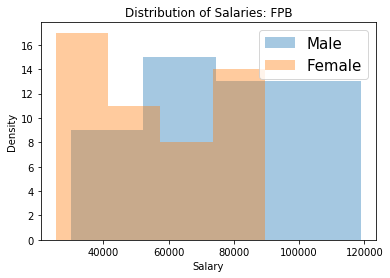

In [56]:
# 3.4  Using seaborn to visualise the differences in salary between men and women

Male = df2[df.Gender == 'Male']
Female = df2[df.Gender == 'Female']

sns.distplot(Male['Salary'], hist = True, kde = False, label='Male')
sns.distplot(Female['Salary'], hist = True, kde = False, label='Female')

# Plot formatting
plt.legend(prop={'size': 15})
plt.title('Distribution of Salaries: FPB')
plt.xlabel('Salary')
plt.ylabel('Density') 

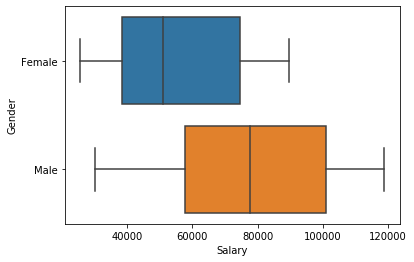

In [57]:
# 3.4 Visualising the Salary data spread using Boxplot (seaborn)

sns.boxplot(x=df2['Salary'], y=df2['Gender'])

* The Boxplot summarises the points that I have discussed so far :
* Male employees while having a wider interquartile range also have higher salaries on average and a higher maximum salary amount

### Defining and Testing my hypotheses

**H<sub>0</sub>** : There is no Employment bias based on Gender (pay) at FPB (e.g there is no difference the salaries of Male and Female employees)

**H<sub>A</sub>** : There is an Employment bias based on Gender (pay) at FPB 

Significance level : 95% (p< 0.05)

In [58]:
# 4.1 Creating a subset of the "Salary" column by Gender

Male_salary = df2[df2['Gender']=='Male']['Salary']

Female_salary = df2[df2['Gender']=='Female']['Salary']

In [59]:
# 4.1 Checking that the new subsets have been created correctly

Male_salary.head(3)

1    44147
2    93715
4    67142
Name: Salary, dtype: int64

In [60]:
# 4.1 Checking that the new subsets have been created correctly

Female_salary.head(3)

0    82232
3    64922
7    89450
Name: Salary, dtype: int64

In [61]:
# 4.2 Testing for normality in our data set.

Male_normal = stats.normaltest(Male_salary)
Male_normal

NormaltestResult(statistic=6.282480752279872, pvalue=0.043229144234422145)

In [62]:
# 4.2 Testing for normality in our data set.

Female_normal = stats.normaltest(Female_salary)
Female_normal

NormaltestResult(statistic=23.505764497893452, pvalue=7.866618567292588e-06)

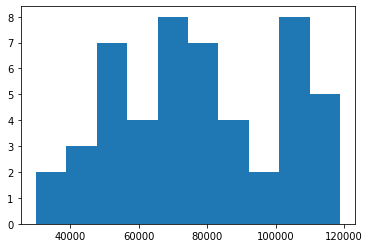

In [63]:
# 4.2 Testing for normality in our data set.

histoMale_salary = plt.hist(Male_salary)

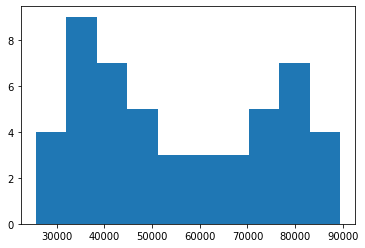

In [64]:
# 4.2 Testing for normality in our data set.

histoFemale_salary = plt.hist(Female_salary)

In [65]:
# 4.3 Using function mann_whitney test to see if there are differences between the salaries of men and women

mann_whitney = stats.mannwhitneyu(Male_salary, Female_salary)

In [66]:
# 4.3 Using function mann_whitney test to see if there are differences between the salaries of men and women

if mann_whitney.pvalue < 0.05:
    print('The p-value is', mann_whitney.pvalue,
          'so the observed differences are very unlikely to be due to chance. I reject the null hypothesis.')
else:
    print('The p-value is', mann_whitney.pvalue,
          'so the observed differences are likely to be due to chance. I accept the null hypothesis.')

The p-value is 1.2082264089084797e-05 so the observed differences are very unlikely to be due to chance. I reject the null hypothesis.


In [67]:
# 4.4 An alternative test. Using function stats.ttest to see if there are differences between  the salaries of men and women.

t_test = stats.ttest_ind(Male_salary, Female_salary)

In [68]:
# 4.4 An alternative test.Using function stats.ttest to see if there are differences between  the salaries of men and women.

if t_test.pvalue < 0.05 :
    print('The p-value was :', t_test.pvalue,
         'The observed differences are very unlikely to be due to chance, I reject the null hypothesis')
else :
    print('The p-value was :',t_test.pvalue,
         'The observed differences are likely to be due to chance, I accept the null hypotheses')

The p-value was : 2.7650476599728173e-06 The observed differences are very unlikely to be due to chance, I reject the null hypothesis
